<a href="https://colab.research.google.com/github/KevinCY-Kim/Deeplearning/blob/main/t_test_%EC%82%AC%EC%A0%84%EA%B2%80%EC%A0%95_%EB%B0%8F_%EC%9C%84%EB%B0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## t-test의 전제조건 3가지
1. 정규성 (Normality)
   모집단이 정규분포를 따른다고 가정.

   특히 표본 크기가 작을 때 중요함 (n < 30).

   검정 방법: Shapiro-Wilk test, Kolmogorov-Smirnov test 등

2. 등분산성 (Homogeneity of Variance)
   두 집단의 분산이 같다는 가정.

   검정 방법: Levene’s test, Bartlett’s test

   만약 분산이 다르다면 → Welch’s t-test 사용

3. 독립성 (Independence)

   각 표본(측정값)은 서로 독립적이어야 함.

   예: 한 환자의 데이터를 여러 번 넣으면 독립성 위배 → 대응표본 t-test 필요

In [ ]:
# 정규성 : 데이터 분포 확인
# 등분산성 : 집단 간 분산 차이 확인
# 독립성 : 표본 간 독립 여부 확인

In [1]:
import numpy as np
from scipy import stats

# 예시 데이터: 두 그룹
group1 = [172, 174, 168, 170, 169]  # 남
group2 = [162, 164, 160, 163, 161]  # 여

# ------------------------------
# 1. 정규성 검정 (Shapiro-Wilk)
# ------------------------------
shapiro1 = stats.shapiro(group1)
shapiro2 = stats.shapiro(group2)
print("Shapiro-Wilk Test")
print("Group1:", shapiro1)
print("Group2:", shapiro2)

# ------------------------------
# 2. 등분산성 검정 (Levene)
# ------------------------------
levene_test = stats.levene(group1, group2)
print("\nLevene Test (등분산성):", levene_test)

# ------------------------------
# 3. t-test
# ------------------------------
# Levene test p-value 확인 후 equal_var 설정
equal_var = True if levene_test.pvalue > 0.05 else False

t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=equal_var)
print("\nt-test 결과")
print("t-통계량:", t_stat)
print("p-value:", p_val)


Shapiro-Wilk Test
Group1: ShapiroResult(statistic=np.float64(0.956989159149141), pvalue=np.float64(0.7868775738883034))
Group2: ShapiroResult(statistic=np.float64(0.986762155211559), pvalue=np.float64(0.9671739349728582))

Levene Test (등분산성): LeveneResult(statistic=np.float64(0.6206896551724139), pvalue=np.float64(0.45349943369504936))

t-test 결과
t-통계량: 6.6748945210744575
p-value: 0.00015671599846307254


🔹 해석

1. Shapiro-Wilk test

   p > 0.05 → 정규성 만족

   p ≤ 0.05 → 정규성 위배

2. Levene test

   p > 0.05 → 등분산성 만족

   p ≤ 0.05 → 등분산성 위배 → equal_var=False 로 t-test 수행

3. t-test

   p < 0.05 → 두 집단 평균 차이 유의미

   p ≥ 0.05 → 차이 유의미하지 않음

In [15]:
!apt-get update -qq
!apt-get install fonts-nanum -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126441 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [52]:
import matplotlib.font_manager as fm

# 폰트 파일 경로
font_path = '/content/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(font_path)

# 나눔 고딕 폰트 설정
plt.rc('font', family='NanumGothic')

print("Matplotlib 폰트 설정이 완료되었습니다.")

Matplotlib 폰트 설정이 완료되었습니다.


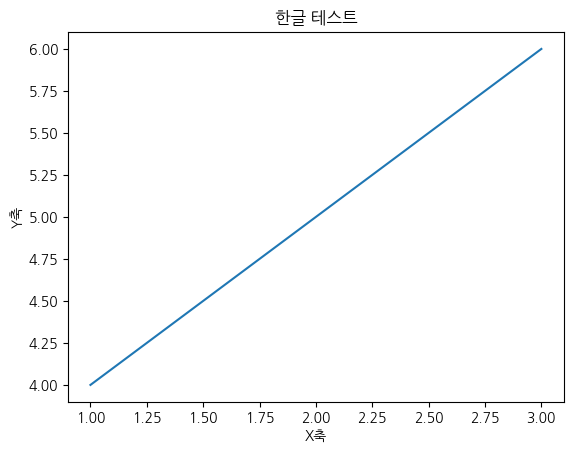

In [39]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설치 후 경로 확인
font_path = '/content/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.plot([1,2,3],[4,5,6])
plt.title("한글 테스트") # Remove fontproperties from here
plt.xlabel("X축") # Remove fontproperties from here
plt.ylabel("Y축") # Remove fontproperties from here
plt.show()

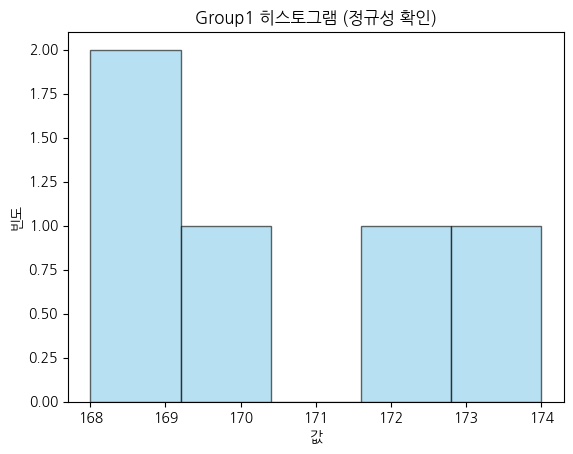

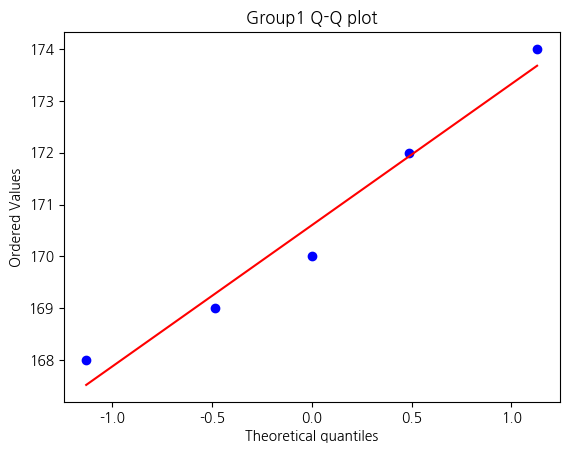

In [45]:
# 정규성 시각화
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 예시 데이터
group1 = [172, 174, 168, 170, 169]

# 히스토그램
plt.hist(group1, bins=5, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Group1 히스토그램 (정규성 확인)")
plt.xlabel("값")
plt.ylabel("빈도")
plt.show()

# Q-Q plot
stats.probplot(group1, dist="norm", plot=plt)
plt.title("Group1 Q-Q plot")
plt.show()

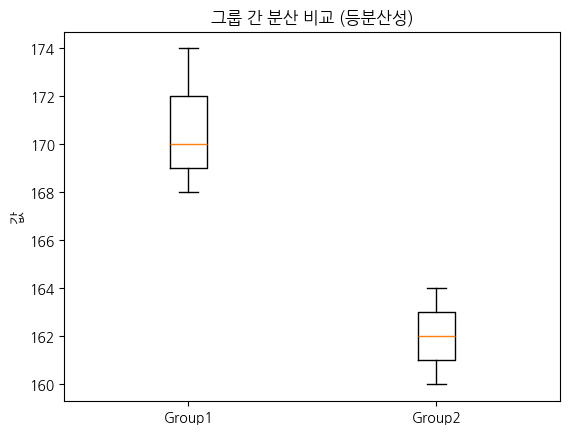

In [46]:
# 등분산성(Homogeneity) 시각화
group2 = [162, 164, 160, 163, 161]

plt.boxplot([group1, group2], labels=["Group1", "Group2"])
plt.title("그룹 간 분산 비교 (등분산성)")
plt.ylabel("값")
plt.show()

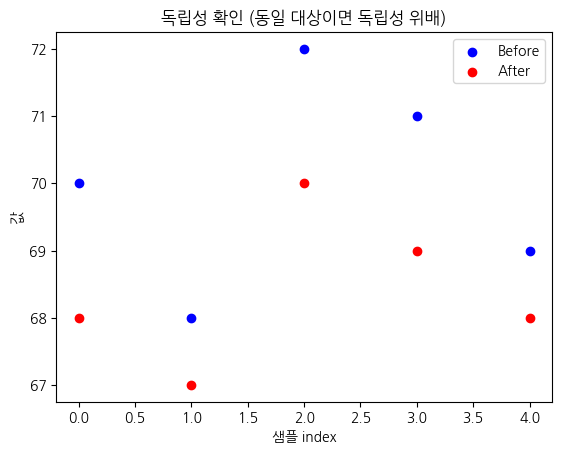

In [47]:
# 독립성 시각화(직접 시각화로 확인 어려움) - 산점도 데이터가 겹치거나 반복 층정 여부로 확인 가능
# 반복 측정 예시 (같은 대상 측정)
before = [70, 68, 72, 71, 69]
after  = [68, 67, 70, 69, 68]

plt.scatter(range(len(before)), before, label="Before", color='blue')
plt.scatter(range(len(after)), after, label="After", color='red')
plt.title("독립성 확인 (동일 대상이면 독립성 위배)")
plt.xlabel("샘플 index")
plt.ylabel("값")
plt.legend()
plt.show()

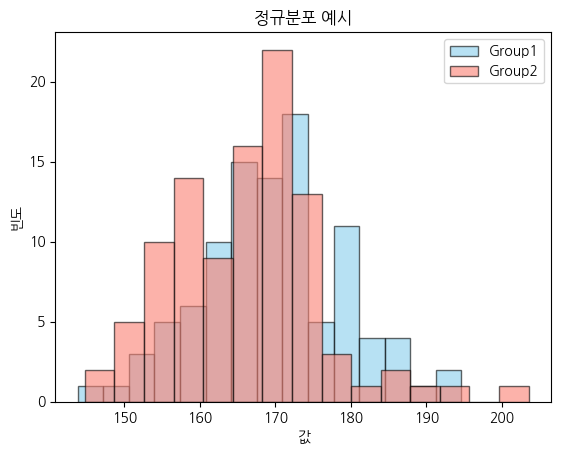

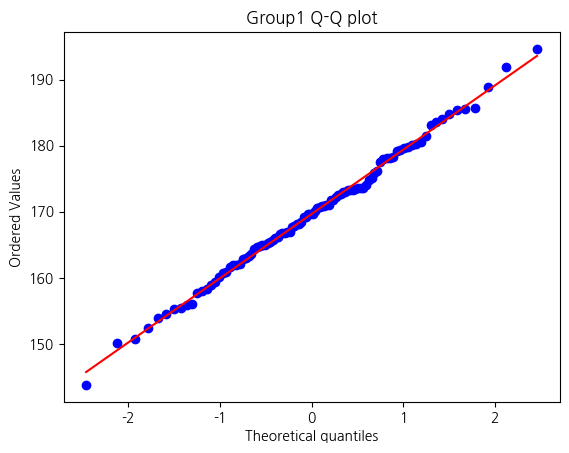

In [48]:
# 정규분포를 확인하자
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 정규분포 데이터 생성 (평균=170, 표준편차=10, 샘플=100)
group1 = np.random.normal(170, 10, 100)
group2 = np.random.normal(165, 10, 100)

# 히스토그램
plt.hist(group1, bins=15, alpha=0.6, color='skyblue', edgecolor='black', label='Group1')
plt.hist(group2, bins=15, alpha=0.6, color='salmon', edgecolor='black', label='Group2')
plt.title("정규분포 예시")
plt.xlabel("값")
plt.ylabel("빈도")
plt.legend()
plt.show()

# Q-Q plot
stats.probplot(group1, dist="norm", plot=plt)
plt.title("Group1 Q-Q plot")
plt.show()

In [49]:
original = [172, 174, 168, 170, 169]
bootstrap = np.random.choice(original, 100, replace=True)

# t-test 전제조건 확인 → 정규성 위배 시 Mann-Whitney U test까지 포함한 확장 버전

🔹 전체 흐름

    데이터 준비 (정규분포/비정규분포 선택 가능)
    정규성 검정 (Shapiro-Wilk)
    등분산성 검정 (Levene)
    t-test 수행 (정규성 만족 시)
    비정규 시 Mann-Whitney U test 수행
    시각화: 히스토그램 + Q-Q plot + 박스플롯

Shapiro-Wilk Test
Group1: ShapiroResult(statistic=np.float64(0.7952566641156664), pvalue=np.float64(5.379326794322721e-05))
Group2: ShapiroResult(statistic=np.float64(0.8380024914325634), pvalue=np.float64(0.00035124792723221))

Levene Test (Homogeneity of Variance): LeveneResult(statistic=np.float64(1.754724971177606), pvalue=np.float64(0.19047962630521892))

Mann-Whitney U test Result (Non-normal data)
U-statistic: 574.0
p-value: 0.06786886081944325


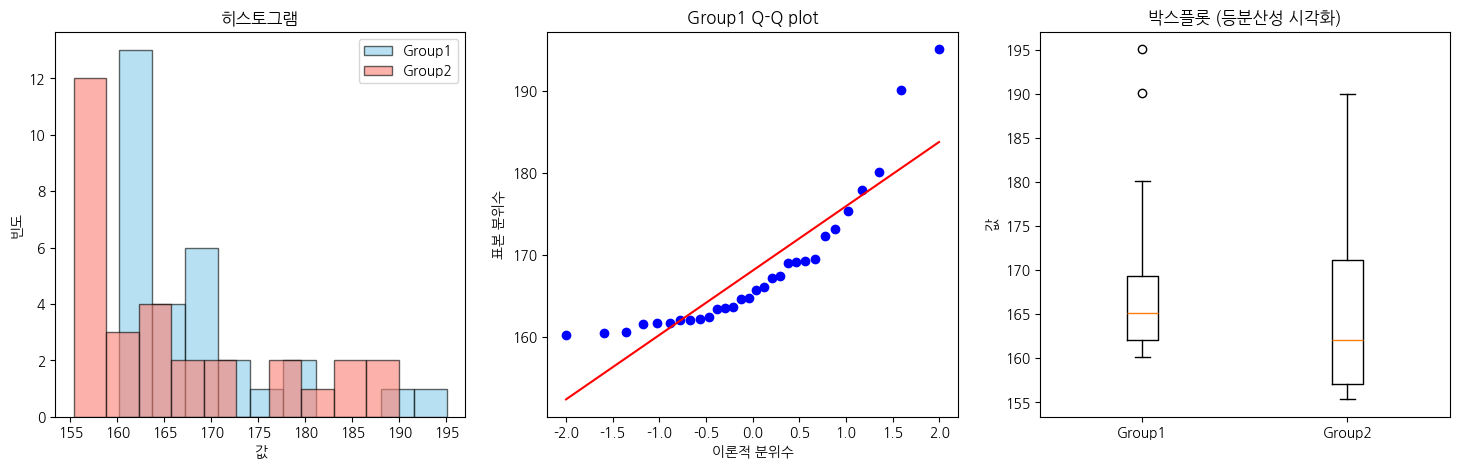

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")  # 경고 숨기기

# -----------------------------
# 1. 데이터 생성 (예시)
# -----------------------------
np.random.seed(42)
# group1 = np.random.normal(170, 10, 30)  # 정규분포 예시
# group2 = np.random.normal(165, 10, 30)

# 비정규분포 예시 (정규성 위배)
group1 = np.random.exponential(1, 30)*10 + 160
group2 = np.random.exponential(1, 30)*10 + 155

# -----------------------------
# 2. 정규성 검정 (Shapiro-Wilk)
# -----------------------------
shapiro1 = stats.shapiro(group1)
shapiro2 = stats.shapiro(group2)
print("Shapiro-Wilk Test")
print("Group1:", shapiro1)
print("Group2:", shapiro2)

# -----------------------------
# 3. 등분산성 검정 (Levene)
# -----------------------------
levene_test = stats.levene(group1, group2)
print("\nLevene Test (Homogeneity of Variance):", levene_test)

# -----------------------------
# 4. t-test or Mann-Whitney U
# -----------------------------
if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05:
    equal_var = True if levene_test.pvalue > 0.05 else False
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=equal_var)
    print("\nt-test Result")
    print("t-statistic:", t_stat)
    print("p-value:", p_val)
else:
    u_stat, p_val = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    print("\nMann-Whitney U test Result (Non-normal data)")
    print("U-statistic:", u_stat)
    print("p-value:", p_val)

# -----------------------------
# 5. Visualization (English labels)
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Histogram
axes[0].hist(group1, bins=10, alpha=0.6, color='skyblue', edgecolor='black', label='Group1')
axes[0].hist(group2, bins=10, alpha=0.6, color='salmon', edgecolor='black', label='Group2')
axes[0].set_title("히스토그램") # Change to Korean
axes[0].set_xlabel("값") # Change to Korean
axes[0].set_ylabel("빈도") # Change to Korean
axes[0].legend()

# Q-Q plot (Group1)
stats.probplot(group1, dist="norm", plot=axes[1])
axes[1].set_title("Group1 Q-Q plot") # Change to Korean
axes[1].set_xlabel("이론적 분위수") # Change to Korean
axes[1].set_ylabel("표본 분위수") # Change to Korean

# Boxplot
axes[2].boxplot([group1, group2], labels=["Group1", "Group2"])
axes[2].set_title("박스플롯 (등분산성 시각화)") # Change to Korean
axes[2].set_ylabel("값") # Change to Korean

plt.show()

🔹 코드 설명

 1. 정규성 검정 → Shapiro-Wilk

     p > 0.05 → 정규성 만족

     p ≤ 0.05 → 정규성 위배 → Mann-Whitney U test

 2. 등분산성 검정 → Levene

     t-test 수행 시 equal_var 설정

     t-test / Mann-Whitney U test 자동 선택

 3. 정규성 만족 → t-test

     정규성 위배 → Mann-Whitney U

 4. 시각화

     히스토그램 → 분포 확인

     Q-Q plot → 정규성 시각 확인

     박스플롯 → 그룹 간 분산 비교